In [1]:
import sys
import os

# Add the path to sys.path for the current Python session
new_path = "/home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax"

# Add to sys.path if not already there
if new_path not in sys.path:
    sys.path.insert(0, new_path)

# Also set PYTHONPATH for any subprocesses
os.environ["PYTHONPATH"] = f"{new_path}:{os.environ.get('PYTHONPATH', '')}"

# Verify it worked
print("Python path updated:")
print(f"sys.path includes: {new_path}")
print(f"PYTHONPATH env var: {os.environ['PYTHONPATH']}")

Python path updated:
sys.path includes: /home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax
PYTHONPATH env var: /home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax:


In [2]:
import sys
import math

import jax.numpy as jnp


def get_sizes(state):
    try:
        size = len(state.current_player)
        width = math.ceil(math.sqrt(size - 0.1))
        if size - (width - 1) ** 2 >= width:
            height = width
        else:
            height = width - 1
    except TypeError:
        size = 1
        width = 1
        height = 1
    return size, width, height


def get_cmap(n_channels):
    # import seaborn as sns  # type: ignore
    # return cmap = sns.color_palette("cubehelix", n_channels)
    assert n_channels in (4, 6, 7, 10)
    if n_channels == 4:
        return [(0.08605633600581405, 0.23824692404212, 0.30561236308077167), (0.32927729263408284, 0.4762845556584382, 0.1837155549758328), (0.8146245329198283, 0.49548316572322215, 0.5752525936416857), (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]
    elif n_channels == 6:
        return [(0.10231025194333628, 0.13952898866828906, 0.2560120319409181), (0.10594361078604106, 0.3809739011595331, 0.27015111282899046), (0.4106130272672762, 0.48044780541672255, 0.1891154277778484), (0.7829183382530567, 0.48158303462490826, 0.48672451968362596), (0.8046168329276406, 0.6365733569301846, 0.8796578402926125), (0.7775608374378459, 0.8840392521212448, 0.9452007992345052)]
    elif n_channels == 7:
        return [(0.10419418740482515, 0.11632019220053316, 0.2327552016195138), (0.08523511613408935, 0.32661779003565533, 0.2973201282529313), (0.26538761550634205, 0.4675654910052002, 0.1908220644759285), (0.6328422475018423, 0.4747981096220677, 0.29070209208025455), (0.8306875710682655, 0.5175161303658079, 0.6628221028832032), (0.7779565181455343, 0.7069421942599752, 0.9314406084043191), (0.7964528047840354, 0.908668973545918, 0.9398253500983916)]
    elif n_channels == 10:
        return [(0.09854228363950114, 0.07115215572295082, 0.16957891809124037), (0.09159726558869188, 0.20394337960213008, 0.29623965888210324), (0.09406611799930162, 0.3578871412608098, 0.2837709711722866), (0.23627685553553793, 0.46114369021199075, 0.19770731888985724), (0.49498740849493095, 0.4799034869159042, 0.21147789468974837), (0.7354526513473981, 0.4748861903571046, 0.40254094042448907), (0.8325928529853291, 0.5253446757844744, 0.6869376931865354), (0.7936920632275369, 0.6641337211433709, 0.9042311843062529), (0.7588424692372241, 0.8253990353420474, 0.9542699331220588), (0.8385645211683802, 0.9411869386771845, 0.9357655639413166)]


# /home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax/pgx/minatar/utils.py

def visualize_minatar(state, savefile=None, fmt="svg", dpi=160):
    # Modified from https://github.com/kenjyoung/MinAtar
    try:
        import matplotlib.colors as colors  # type: ignore
        import matplotlib.pyplot as plt  # type: ignore
    except ImportError:
        sys.stderr.write("MinAtar environment requires matplotlib for visualization. Please install matplotlib.")
        sys.exit(1)

    obs = state.observation
    n_channels = obs.shape[-1]
    cmap = get_cmap(n_channels)
    cmap.insert(0, (0, 0, 0))
    cmap = colors.ListedColormap(cmap)
    bounds = [i for i in range(n_channels + 2)]
    norm = colors.BoundaryNorm(bounds, n_channels + 1)
    size, w, h = get_sizes(state)
    fig, ax = plt.subplots(h, w)
    n_channels = obs.shape[-1]
    if size == 1:
        numerical_state = (
            jnp.amax(
                obs * jnp.reshape(jnp.arange(n_channels) + 1, (1, 1, -1)), 2
            )
            + 0.5
        )
        ax.imshow(numerical_state, cmap=cmap, norm=norm, interpolation="none")
        ax.set_axis_off()
    else:
        for j in range(size):
            numerical_state = (
                jnp.amax(
                    obs[j] * jnp.reshape(jnp.arange(n_channels) + 1, (1, 1, -1)),
                    2,
                )
                + 0.5
            )
            if h == 1:
                ax[j].imshow(numerical_state, cmap=cmap, norm=norm, interpolation="none")
                ax[j].set_axis_off()
            else:
                ax[j // w, j % w].imshow(numerical_state, cmap=cmap, norm=norm, interpolation="none")
                ax[j // w, j % w].set_axis_off()

    if savefile is None:
        # Return in-memory image
        if fmt == "svg":
            from io import StringIO
            sio = StringIO()
            plt.savefig(sio, format="svg", bbox_inches="tight")
            plt.close(fig)
            return sio.getvalue()  # str (SVG markup)
        else:
            from io import BytesIO
            bio = BytesIO()
            plt.savefig(bio, format=fmt, bbox_inches="tight", dpi=dpi)
            plt.close(fig)
            bio.seek(0)
            return bio.getvalue()  # bytes (e.g., PNG)
    else:
        plt.savefig(savefile, format=fmt, bbox_inches="tight", dpi=(None if fmt == "svg" else dpi))
        plt.close(fig)
        return savefile


In [3]:
"""MinAtar/SpaceInvaders: A fork of github.com/kenjyoung/MinAtar

The authors of original MinAtar implementation are:
    * Kenny Young (kjyoung@ualberta.ca)
    * Tian Tian (ttian@ualberta.ca)
The original MinAtar implementation is distributed under GNU General Public License v3.0
    * https://github.com/kenjyoung/MinAtar/blob/master/License.txt
"""
from typing import Literal, Optional

import jax
import jax.lax as lax
from jax import numpy as jnp

import pgx.core as core
from pgx._src.struct import dataclass
from pgx._src.types import Array, PRNGKey

FALSE = jnp.bool_(False)
TRUE = jnp.bool_(True)

SHOT_COOL_DOWN = jnp.int32(5)
ENEMY_MOVE_INTERVAL = jnp.int32(12)
ENEMY_SHOT_INTERVAL = jnp.int32(10)

ZERO = jnp.int32(0)
NINE = jnp.int32(9)


@dataclass
class State(core.State):
    current_player: Array = jnp.int32(0)
    observation: Array = jnp.zeros((10, 10, 6), dtype=jnp.bool_)
    rewards: Array = jnp.zeros(1, dtype=jnp.float32)  # (1,)
    terminated: Array = FALSE
    truncated: Array = FALSE
    legal_action_mask: Array = jnp.ones(4, dtype=jnp.bool_)
    _step_count: Array = jnp.int32(0)
    # --- MinAtar SpaceInvaders specific ---
    _pos: Array = jnp.int32(5)
    _f_bullet_map: Array = jnp.zeros((10, 10), dtype=jnp.bool_)
    _e_bullet_map: Array = jnp.zeros((10, 10), dtype=jnp.bool_)
    _alien_map: Array = (
        jnp.zeros((10, 10), dtype=jnp.bool_).at[0:4, 2:8].set(TRUE)
    )
    _alien_dir: Array = jnp.int32(-1)
    _enemy_move_interval: Array = ENEMY_MOVE_INTERVAL
    _alien_move_timer: Array = ENEMY_MOVE_INTERVAL
    _alien_shot_timer: Array = ENEMY_SHOT_INTERVAL
    _ramp_index: Array = jnp.int32(0)
    _shot_timer: Array = jnp.int32(0)
    _terminal: Array = FALSE
    _last_action: Array = jnp.int32(0)

    @property
    def env_id(self) -> core.EnvId:
        return "minatar-space_invaders"

    def to_svg(
        self,
        *,
        color_theme: Optional[Literal["light", "dark"]] = None,
        scale: Optional[float] = None,
    ) -> str:
        del color_theme, scale
        from .utils import visualize_minatar

        return visualize_minatar(self)

    def save_svg(
        self,
        filename,
        *,
        color_theme: Optional[Literal["light", "dark"]] = None,
        scale: Optional[float] = None,
    ) -> None:
        from .utils import visualize_minatar

        visualize_minatar(self, filename)


class MinAtarSpaceInvaders(core.Env):
    def __init__(
        self,
        *,
        use_minimal_action_set: bool = True,
        sticky_action_prob: float = 0.1,
    ):
        super().__init__()
        self.use_minimal_action_set = use_minimal_action_set
        self.sticky_action_prob: float = sticky_action_prob
        self.minimal_action_set = jnp.int32([0, 1, 3, 5])
        self.legal_action_mask = jnp.ones(6, dtype=jnp.bool_)
        if self.use_minimal_action_set:
            self.legal_action_mask = jnp.ones(
                self.minimal_action_set.shape[0], dtype=jnp.bool_
            )

    def step(
        self, state: core.State, action: Array, key: Optional[Array] = None
    ) -> core.State:
        assert key is not None, (
            "v2.0.0 changes the signature of step. Please specify PRNGKey at the third argument:\n\n"
            "  * <  v2.0.0: step(state, action)\n"
            "  * >= v2.0.0: step(state, action, key)\n\n"
            "See v2.0.0 release note for more details:\n\n"
            "  https://github.com/sotetsuk/pgx/releases/tag/v2.0.0"
        )
        return super().step(state, action, key)

    def _init(self, key: PRNGKey) -> State:
        state = State()
        state = state.replace(legal_action_mask=self.legal_action_mask)  # type: ignore
        return state  # type: ignore

    def _step(self, state: core.State, action, key) -> State:
        state = state.replace(legal_action_mask=self.legal_action_mask)  # type: ignore
        action = jax.lax.select(
            self.use_minimal_action_set,
            self.minimal_action_set[action],
            action,
        )
        return _step(state, action, key, self.sticky_action_prob)  # type: ignore

    def _observe(self, state: core.State, player_id: Array) -> Array:
        assert isinstance(state, State)
        return _observe(state)

    @property
    def id(self) -> core.EnvId:
        return "minatar-space_invaders"

    @property
    def version(self) -> str:
        return "v1"

    @property
    def num_players(self):
        return 1


def _step(
    state: State,
    action: Array,
    key,
    sticky_action_prob,
):
    action = jnp.int32(action)
    action = jax.lax.cond(
        jax.random.uniform(key) < sticky_action_prob,
        lambda: state._last_action,
        lambda: action,
    )
    return _step_det(state, action)


def _observe(state: State) -> Array:
    obs = jnp.zeros((10, 10, 6), dtype=jnp.bool_)
    obs = obs.at[9, state._pos, 0].set(TRUE)
    obs = obs.at[:, :, 1].set(state._alien_map)
    obs = obs.at[:, :, 2].set(
        lax.cond(
            state._alien_dir < 0,
            lambda: state._alien_map,
            lambda: jnp.zeros_like(state._alien_map),
        )
    )
    obs = obs.at[:, :, 3].set(
        lax.cond(
            state._alien_dir < 0,
            lambda: jnp.zeros_like(state._alien_map),
            lambda: state._alien_map,
        )
    )
    obs = obs.at[:, :, 4].set(state._f_bullet_map)
    obs = obs.at[:, :, 5].set(state._e_bullet_map)
    return obs


def _step_det(
    state: State,
    action: Array,
):
    r = jnp.float32(0)

    pos = state._pos
    f_bullet_map = state._f_bullet_map
    e_bullet_map = state._e_bullet_map
    alien_map = state._alien_map
    alien_dir = state._alien_dir
    enemy_move_interval = state._enemy_move_interval
    alien_move_timer = state._alien_move_timer
    alien_shot_timer = state._alien_shot_timer
    ramp_index = state._ramp_index
    shot_timer = state._shot_timer
    terminal = state._terminal

    # Resolve player action
    # action_map = ['n','l','u','r','d','f']
    pos, f_bullet_map, shot_timer = _resole_action(
        pos, f_bullet_map, shot_timer, action
    )

    # Update Friendly Bullets
    f_bullet_map = jnp.roll(f_bullet_map, -1, axis=0)
    f_bullet_map = f_bullet_map.at[9, :].set(FALSE)

    # Update Enemy Bullets
    e_bullet_map = jnp.roll(e_bullet_map, 1, axis=0)
    e_bullet_map = e_bullet_map.at[0, :].set(FALSE)
    terminal = lax.cond(e_bullet_map[9, pos], lambda: TRUE, lambda: terminal)

    # Update aliens
    terminal = lax.cond(alien_map[9, pos], lambda: TRUE, lambda: terminal)
    alien_move_timer, alien_map, alien_dir, terminal = lax.cond(
        alien_move_timer == 0,
        lambda: _update_alien_by_move_timer(
            alien_map, alien_dir, enemy_move_interval, pos, terminal
        ),
        lambda: (alien_move_timer, alien_map, alien_dir, terminal),
    )
    timer_zero = alien_shot_timer == 0
    alien_shot_timer = lax.cond(
        timer_zero, lambda: ENEMY_SHOT_INTERVAL, lambda: alien_shot_timer
    )
    e_bullet_map = lax.cond(
        timer_zero,
        lambda: e_bullet_map.at[_nearest_alien(pos, alien_map)].set(TRUE),
        lambda: e_bullet_map,
    )

    kill_locations = alien_map & (alien_map == f_bullet_map)

    r += jnp.sum(kill_locations, dtype=jnp.float32)
    alien_map = alien_map & (~kill_locations)
    f_bullet_map = f_bullet_map & (~kill_locations)

    # Update various timers
    shot_timer -= shot_timer > 0
    alien_move_timer -= 1
    alien_shot_timer -= 1
    ramping = True
    is_enemy_zero = jnp.count_nonzero(alien_map) == 0
    enemy_move_interval, ramp_index = lax.cond(
        is_enemy_zero & (enemy_move_interval > 6) & ramping,
        lambda: (enemy_move_interval - 1, ramp_index + 1),
        lambda: (enemy_move_interval, ramp_index),
    )
    alien_map = lax.cond(
        is_enemy_zero,
        lambda: alien_map.at[0:4, 2:8].set(TRUE),
        lambda: alien_map,
    )

    return state.replace(  # type: ignore
        _pos=pos,
        _f_bullet_map=f_bullet_map,
        _e_bullet_map=e_bullet_map,
        _alien_map=alien_map,
        _alien_dir=alien_dir,
        _enemy_move_interval=enemy_move_interval,
        _alien_move_timer=alien_move_timer,
        _alien_shot_timer=alien_shot_timer,
        _ramp_index=ramp_index,
        _shot_timer=shot_timer,
        _terminal=terminal,
        _last_action=action,
        rewards=r[jnp.newaxis],
        terminated=terminal,
    )


def _resole_action(pos, f_bullet_map, shot_timer, action):
    f_bullet_map = lax.cond(
        (action == 5) & (shot_timer == 0),
        lambda: f_bullet_map.at[9, pos].set(TRUE),
        lambda: f_bullet_map,
    )
    shot_timer = lax.cond(
        (action == 5) & (shot_timer == 0),
        lambda: SHOT_COOL_DOWN,
        lambda: shot_timer,
    )
    pos = lax.cond(
        action == 1, lambda: jax.lax.max(ZERO, pos - 1), lambda: pos
    )
    pos = lax.cond(
        action == 3, lambda: jax.lax.min(NINE, pos + 1), lambda: pos
    )
    return pos, f_bullet_map, shot_timer


def _nearest_alien(pos, alien_map):
    search_order = jnp.argsort(jnp.abs(jnp.arange(10, dtype=jnp.int32) - pos))
    ix = lax.while_loop(
        lambda i: jnp.sum(alien_map[:, search_order[i]]) <= 0,
        lambda i: i + 1,
        0,
    )
    ix = search_order[ix]
    j = lax.while_loop(lambda i: alien_map[i, ix] == 0, lambda i: i - 1, 9)
    return (j, ix)


def _update_alien_by_move_timer(
    alien_map, alien_dir, enemy_move_interval, pos, terminal
):
    alien_move_timer = lax.min(
        jnp.sum(alien_map, dtype=jnp.int32), enemy_move_interval
    )
    cond = ((jnp.sum(alien_map[:, 0]) > 0) & (alien_dir < 0)) | (
        (jnp.sum(alien_map[:, 9]) > 0) & (alien_dir > 0)
    )
    terminal = lax.cond(
        cond & (jnp.sum(alien_map[9, :]) > 0),
        lambda: jnp.bool_(True),
        lambda: terminal,
    )
    alien_dir = lax.cond(cond, lambda: -alien_dir, lambda: alien_dir)
    alien_map = lax.cond(
        cond,
        lambda: jnp.roll(alien_map, 1, axis=0),
        lambda: jnp.roll(alien_map, alien_dir, axis=1),
    )
    terminal = lax.cond(
        alien_map[9, pos], lambda: jnp.bool_(True), lambda: terminal
    )
    return alien_move_timer, alien_map, alien_dir, terminal


In [4]:
"""
MinAtar/Breakout with JIT-compatible K-frame skipping.

Changes vs. baseline:
- Add `frame_skip: int = 2` to MinAtarBreakout.__init__.
- Implement frame skipping inside `_step` via `jax.lax.fori_loop`.
- Compute a single effective action (after sticky override) and repeat it
  for `frame_skip` internal steps, accumulating rewards. Observation comes
  from the final internal step, and `terminated` reflects any terminal reached
  during the repeated steps.
"""

from typing import Literal, Optional

import jax
from jax import numpy as jnp

import pgx.core as core
from pgx._src.struct import dataclass
from pgx._src.types import Array, PRNGKey

FALSE = jnp.bool_(False)
TRUE = jnp.bool_(True)
ZERO = jnp.array(0, dtype=jnp.int32)
ONE = jnp.array(1, dtype=jnp.int32)
TWO = jnp.array(2, dtype=jnp.int32)
THREE = jnp.array(3, dtype=jnp.int32)
FOUR = jnp.array(4, dtype=jnp.int32)
NINE = jnp.array(9, dtype=jnp.int32)


@dataclass
class State(core.State):
    current_player: Array = jnp.int32(0)
    observation: Array = jnp.zeros((10, 10, 4), dtype=jnp.bool_)
    rewards: Array = jnp.zeros(1, dtype=jnp.float32)  # (1,)
    terminated: Array = FALSE
    truncated: Array = FALSE
    legal_action_mask: Array = jnp.ones(3, dtype=jnp.bool_)
    _step_count: Array = jnp.int32(0)
    # --- MinAtar Breakout specific ---
    _ball_y: Array = THREE
    _ball_x: Array = ZERO
    _ball_dir: Array = TWO
    _pos: Array = FOUR
    _brick_map: Array = (
        jnp.zeros((10, 10), dtype=jnp.bool_).at[1:4, :].set(True)
    )
    _strike: Array = jnp.array(False, dtype=jnp.bool_)
    _last_x: Array = ZERO
    _last_y: Array = THREE
    _terminal: Array = jnp.array(False, dtype=jnp.bool_)
    _last_action: Array = ZERO

    @property
    def env_id(self) -> core.EnvId:
        return "minatar-breakout"

    def to_svg(
        self,
        *,
        color_theme: Optional[Literal["light", "dark"]] = None,
        scale: Optional[float] = None,
    ) -> str:
        del color_theme, scale
        from .utils import visualize_minatar

        return visualize_minatar(self)

    def save_svg(
        self,
        filename,
        *,
        color_theme: Optional[Literal["light", "dark"]] = None,
        scale: Optional[float] = None,
    ) -> None:
        from .utils import visualize_minatar

        visualize_minatar(self, filename)


class MinAtarBreakout(core.Env):
    def __init__(
        self,
        *,
        use_minimal_action_set: bool = True,
        sticky_action_prob: float = 0.1,
        frame_skip: int = 2,  # NEW: K-frame skipping (default 2)
    ):
        super().__init__()
        assert frame_skip >= 1, "frame_skip must be >= 1"
        self.use_minimal_action_set = use_minimal_action_set
        self.sticky_action_prob: float = float(sticky_action_prob)
        self.frame_skip: int = int(frame_skip)

        # Minimal action set mapping (NOOP/LEFT/RIGHT for Breakout)
        self.minimal_action_set = jnp.int32([0, 1, 3])

        # Legal mask is either 6 (full) or 3 (minimal)
        self.legal_action_mask = jnp.ones(6, dtype=jnp.bool_)
        if self.use_minimal_action_set:
            self.legal_action_mask = jnp.ones(
                self.minimal_action_set.shape[0], dtype=jnp.bool_
            )

    def step(
        self, state: core.State, action: Array, key: Optional[Array] = None
    ) -> core.State:
        assert key is not None, (
            "v2.0.0 changes the signature of step. Please specify PRNGKey at the third argument:\n\n"
            "  * <  v2.0.0: step(state, action)\n"
            "  * >= v2.0.0: step(state, action, key)\n\n"
            "See v2.0.0 release note for more details:\n\n"
            "  https://github.com/sotetsuk/pgx/releases/tag/v2.0.0"
        )
        return super().step(state, action, key)

    def _init(self, key: PRNGKey) -> State:
        state = _init(rng=key)  # type: ignore
        state = state.replace(legal_action_mask=self.legal_action_mask)  # type: ignore
        return state  # type: ignore

    def _step(self, state: core.State, action, key) -> State:
        """One external env step = repeat the (sticky-processed) action for `frame_skip` internal steps."""
        # Ensure the state carries the current legal mask
        state = state.replace(legal_action_mask=self.legal_action_mask)  # type: ignore

        # Minimal action set mapping (JAX-friendly select)
        action = jax.lax.select(
            jnp.bool_(self.use_minimal_action_set),
            self.minimal_action_set[action],
            action,
        )

        # Compute effective action once (sticky override) for this macro-step
        # Then repeat that effective action for `frame_skip` internal steps.
        effective_action = jax.lax.cond(
            jax.random.uniform(key) < self.sticky_action_prob,
            lambda: jnp.int32(state._last_action),
            lambda: jnp.int32(action),
        )

        # fori_loop carry: (State, total_reward(float32), done(bool))
        def body_fn(i, carry):
            s, rsum, done = carry

            def do_step(args):
                s_inner, rsum_inner, _ = args
                s_next = _step_det(s_inner, effective_action)
                rsum_next = rsum_inner + s_next.rewards[0]
                done_next = s_next.terminated
                return (s_next, rsum_next, done_next)

            # If already done, keep state as-is (no-op), preserving JIT compatibility
            return jax.lax.cond(done, lambda x: x, do_step, (s, rsum, done))

        r0 = jnp.array(0.0, dtype=jnp.float32)
        d0 = FALSE
        state, total_r, _ = jax.lax.fori_loop(0, int(self.frame_skip), body_fn, (state, r0, d0))

        # Overwrite rewards with the accumulated total for this external step
        state = state.replace(rewards=total_r[jnp.newaxis])  # type: ignore
        return state  # type: ignore

    def _observe(self, state: core.State, player_id: Array) -> Array:
        assert isinstance(state, State)
        return _observe(state)

    @property
    def id(self) -> core.EnvId:
        return "minatar-breakout"

    @property
    def version(self) -> str:
        return "v1"

    @property
    def num_players(self):
        return 1


def _step_det(state: State, action: Array):
    ball_y = state._ball_y
    ball_x = state._ball_x
    ball_dir = state._ball_dir
    pos = state._pos
    brick_map = state._brick_map
    strike = state._strike
    terminal = state._terminal

    r = jnp.array(0, dtype=jnp.float32)

    pos = _apply_action(pos, action)

    # Update ball position
    last_x = ball_x
    last_y = ball_y
    new_x, new_y = _update_ball_pos(ball_x, ball_y, ball_dir)

    new_x, ball_dir = jax.lax.cond(
        (new_x < 0) | (new_x > 9),
        lambda: _update_ball_pos_x(new_x, ball_dir),
        lambda: (new_x, ball_dir),
    )

    is_new_y_negative = new_y < 0
    is_strike = brick_map[new_y, new_x] == 1
    is_bottom = new_y == 9
    new_y, ball_dir = jax.lax.cond(
        is_new_y_negative,
        lambda: _update_ball_pos_y(ball_dir),
        lambda: (new_y, ball_dir),
    )
    strike_toggle = ~is_new_y_negative & is_strike
    r, strike, brick_map, new_y, ball_dir = jax.lax.cond(
        ~is_new_y_negative & is_strike & ~strike,
        lambda: _update_by_strike(
            r, brick_map, new_x, new_y, last_y, ball_dir, strike
        ),
        lambda: (r, strike, brick_map, new_y, ball_dir),
    )
    brick_map, new_y, ball_dir, terminal = jax.lax.cond(
        ~is_new_y_negative & ~is_strike & is_bottom,
        lambda: _update_by_bottom(
            brick_map, ball_x, new_x, new_y, pos, ball_dir, last_y, terminal
        ),
        lambda: (brick_map, new_y, ball_dir, terminal),
    )

    strike = jax.lax.cond(
        ~strike_toggle, lambda: jnp.zeros_like(strike), lambda: strike
    )

    state = state.replace(  # type: ignore
        _ball_y=new_y,
        _ball_x=new_x,
        _ball_dir=ball_dir,
        _pos=pos,
        _brick_map=brick_map,
        _strike=strike,
        _last_x=last_x,
        _last_y=last_y,
        _terminal=terminal,
        _last_action=action,
        rewards=r[jnp.newaxis],
        terminated=terminal,
    )
    return state


def _init(rng: Array) -> State:
    ball_start = jax.random.choice(rng, 2)
    return _init_det(ball_start=ball_start)


def _apply_action(pos, action):
    pos = jax.lax.cond(
        action == 1, lambda: jax.lax.max(ZERO, pos - ONE), lambda: pos
    )
    pos = jax.lax.cond(
        action == 3, lambda: jax.lax.min(NINE, pos + ONE), lambda: pos
    )
    return pos


def _update_ball_pos(ball_x, ball_y, ball_dir):
    return jax.lax.switch(
        ball_dir,
        [
            lambda: (ball_x - ONE, ball_y - ONE),
            lambda: (ball_x + ONE, ball_y - ONE),
            lambda: (ball_x + ONE, ball_y + ONE),
            lambda: (ball_x - ONE, ball_y + ONE),
        ],
    )


def _update_ball_pos_x(new_x, ball_dir):
    new_x = jax.lax.max(ZERO, new_x)
    new_x = jax.lax.min(NINE, new_x)
    ball_dir = jnp.array([1, 0, 3, 2], dtype=jnp.int32)[ball_dir]
    return new_x, ball_dir


def _update_ball_pos_y(ball_dir):
    ball_dir = jnp.array([3, 2, 1, 0], dtype=jnp.int32)[ball_dir]
    return ZERO, ball_dir


def _update_by_strike(r, brick_map, new_x, new_y, last_y, ball_dir, strike):
    brick_map = brick_map.at[new_y, new_x].set(False)
    new_y = last_y
    ball_dir = jnp.array([3, 2, 1, 0], dtype=jnp.int32)[ball_dir]
    return r + 1, jnp.ones_like(strike), brick_map, new_y, ball_dir


def _update_by_bottom(
    brick_map, ball_x, new_x, new_y, pos, ball_dir, last_y, terminal
):
    brick_map = jax.lax.cond(
        brick_map.sum() == 0,
        lambda: brick_map.at[1:4, :].set(True),
        lambda: brick_map,
    )
    new_y, ball_dir, terminal = jax.lax.cond(
        ball_x == pos,
        lambda: (
            last_y,
            jnp.array([3, 2, 1, 0], dtype=jnp.int32)[ball_dir],
            terminal,
        ),
        lambda: jax.lax.cond(
            new_x == pos,
            lambda: (
                last_y,
                jnp.array([2, 3, 0, 1], dtype=jnp.int32)[ball_dir],
                terminal,
            ),
            lambda: (new_y, ball_dir, jnp.array(True, dtype=jnp.bool_)),
        ),
    )
    return brick_map, new_y, ball_dir, terminal


def _init_det(ball_start: Array) -> State:
    ball_x, ball_dir = jax.lax.switch(
        ball_start,
        [lambda: (ZERO, TWO), lambda: (NINE, THREE)],
    )
    last_x = ball_x
    return State(
        _ball_x=ball_x, _ball_dir=ball_dir, _last_x=last_x
    )  # type: ignore


def _observe(state: State) -> Array:
    obs = jnp.zeros((10, 10, 4), dtype=jnp.bool_)
    obs = obs.at[state._ball_y, state._ball_x, 1].set(True)
    obs = obs.at[9, state._pos, 0].set(True)
    obs = obs.at[state._last_y, state._last_x, 2].set(True)
    obs = obs.at[:, :, 3].set(state._brick_map)
    return obs


In [5]:
# -----------------------------
# Config
# -----------------------------
from pydantic import BaseModel
import pgx
class PPOConfig(BaseModel):
    env_name: Literal[
        "minatar-breakout",
        "minatar-freeway",
        "minatar-space_invaders",
        "minatar-asterix",
        "minatar-seaquest",
    ] = "minatar-breakout"
    seed: int = 0
    lr: float = 0.0003
    num_envs: int = 4096
    num_eval_envs: int = 100
    num_steps: int = 128
    plan_horizon: int = 4
    total_timesteps: int = 20_000_000
    frame_skip: int = 1
    update_epochs: int = 3
    minibatch_size: int = 4096
    gamma: float = 0.99
    gae_lambda: float = 0.95
    clip_eps: float = 0.2
    ent_coef: float = 0.01
    vf_coef: float = 0.5
    max_grad_norm: float = 0.5
    wandb_project: str = "pgx-minatar-ppo"
    save_model: bool = True
    

    class Config:
        extra = "forbid"


# In Jupyter, directly create the config instead of parsing CLI args
# You can override any default values here
args = PPOConfig(
    env_name="minatar-space_invaders",  # Change this to test different games
    num_envs=4096,  # Smaller for testing in notebook
    total_timesteps=200000000,  # Shorter for testing
    frame_skip = 1,
    save_model=True,  # Don't save in notebook by default
)
print(f"Config: {args}")

env = pgx.make(str(args.env_name))
if args.env_name == "minatar-freeway":
    print("using custom env")
    env = MinAtarFreeway(
        use_minimal_action_set=True,
        sticky_action_prob=0.1,
        frame_skip=args.frame_skip,
    )
if args.env_name == "minatar-breakout":
    env = MinAtarBreakout(
        use_minimal_action_set=True,
        sticky_action_prob=0.1,
        frame_skip=args.frame_skip,
    )
if args.env_name == "minatar-space_invaders":
    env = MinAtarSpaceInvaders()

num_updates = args.total_timesteps // args.num_envs // args.num_steps
num_minibatches = args.num_envs * args.num_steps // args.minibatch_size
ppo_args = args


Config: env_name='minatar-space_invaders' seed=0 lr=0.0003 num_envs=4096 num_eval_envs=100 num_steps=128 plan_horizon=4 total_timesteps=200000000 frame_skip=1 update_epochs=3 minibatch_size=4096 gamma=0.99 gae_lambda=0.95 clip_eps=0.2 ent_coef=0.01 vf_coef=0.5 max_grad_norm=0.5 wandb_project='pgx-minatar-ppo' save_model=True


In [ ]:
# === Macro-PPO with Autoregressive (AR) Plan Head ===
import os, io, math, time, pickle, sys
from functools import partial
from typing import NamedTuple

import jax
import jax.numpy as jnp
import optax
from flax import nnx
import wandb

import pgx
from pgx.experimental import auto_reset
from pydantic import BaseModel


# ---------------------------------------
# Simple categorical wrapper
# ---------------------------------------
class Categorical:
    def __init__(self, logits):
        self.logits = logits  # [..., A]

    def sample(self, seed):
        # vectorized sample across leading dims
        return jax.random.categorical(seed, self.logits, axis=-1)

    def log_prob(self, value):
        # value: shape logits.shape[:-1]
        log_probs = jax.nn.log_softmax(self.logits, axis=-1)
        return jnp.take_along_axis(log_probs, value[..., None], axis=-1).squeeze(-1)

    def entropy(self):
        log_probs = jax.nn.log_softmax(self.logits, axis=-1)
        probs = jax.nn.softmax(self.logits, axis=-1)
        return -(probs * log_probs).sum(axis=-1)

# ---------------------------------------
# Utility
# ---------------------------------------
def pool_out_dim(n: int, window: int = 2, stride: int = 2, padding: str = "VALID") -> int:
    if padding.upper() == "VALID":
        return (n - window) // stride + 1
    return math.ceil(n / stride)

# ---------------------------------------
# Actor-Critic with AR plan head (Macro-PPO)
# ---------------------------------------
class ActorCritic(nnx.Module):
    def __init__(
        self,
        num_actions: int,
        obs_shape,
        activation: str = "tanh",
        *,
        rngs: nnx.Rngs,
        plan_horizon: int = 4,
        ar_hidden: int = 128,
        time_embed_dim: int = 16,
    ):
        assert activation in ["relu", "tanh"]
        self.num_actions = int(num_actions)
        self.activation = activation
        self.plan_horizon = int(plan_horizon)
        self.ar_hidden = int(ar_hidden)
        self.time_embed_dim = int(time_embed_dim)

        H, W, C = obs_shape
        # shared torso
        self.conv = nnx.Conv(in_features=C, out_features=32, kernel_size=(2, 2), rngs=rngs)
        self.avg_pool = partial(nnx.avg_pool, window_shape=(2, 2), strides=(2, 2), padding="VALID")
        H2 = pool_out_dim(H, 2, 2, "VALID")
        W2 = pool_out_dim(W, 2, 2, "VALID")
        flatten_dim = H2 * W2 * 32
        self.torso_dim = 64
        self.fc = nnx.Linear(flatten_dim, self.torso_dim, rngs=rngs)

        # single-step actor (kept for compatibility)
        self.actor_h1 = nnx.Linear(64, 64, rngs=rngs)
        self.actor_h2 = nnx.Linear(64, 64, rngs=rngs)
        self.actor_out = nnx.Linear(64, num_actions, rngs=rngs)

        # critic
        self.critic_h1 = nnx.Linear(64, 64, rngs=rngs)
        self.critic_h2 = nnx.Linear(64, 64, rngs=rngs)
        self.critic_out = nnx.Linear(64, 1, rngs=rngs)

        # AR plan head
        in_dim = self.num_actions + self.time_embed_dim + self.torso_dim

        self.hid_init = nnx.Linear(self.torso_dim, self.ar_hidden, rngs=rngs)
        self.gru_z = nnx.Linear(self.ar_hidden + in_dim, self.ar_hidden, rngs=rngs)
        self.gru_r = nnx.Linear(self.ar_hidden + in_dim, self.ar_hidden, rngs=rngs)
        self.gru_n = nnx.Linear(self.ar_hidden + in_dim, self.ar_hidden, rngs=rngs)
        self.ar_out = nnx.Linear(self.ar_hidden, self.num_actions, rngs=rngs)

    # helpers
    def _act(self, x): 
        return nnx.relu(x) if self.activation == "relu" else nnx.tanh(x)

    def _torso(self, x):
        x = x.astype(jnp.float32)
        x = self.conv(x)
        x = nnx.relu(x)
        x = self.avg_pool(x)
        x = x.reshape((x.shape[0], -1))
        x = nnx.relu(self.fc(x))
        return x  # [B,64]

    # standard API (single-step)
    def __call__(self, x):
        h = self._torso(x)
        a = self._act(self.actor_h1(h)); a = self._act(self.actor_h2(a))
        logits = self.actor_out(a)
        v = self._act(self.critic_h1(h)); v = self._act(self.critic_h2(v))
        value = self.critic_out(v)
        return logits, jnp.squeeze(value, axis=-1)

    # AR cell
    def _gru(self, h, x):
        hx = jnp.concatenate([h, x], axis=-1)
        z = jax.nn.sigmoid(self.gru_z(hx))
        r = jax.nn.sigmoid(self.gru_r(hx))
        hx_r = jnp.concatenate([r * h, x], axis=-1)
        n = jnp.tanh(self.gru_n(hx_r))
        return (1.0 - z) * h + z * n

    def _time_feat(self, t):
    # t: scalar jnp.int32/jnp.int64, works under JIT/scan
        D = self.time_embed_dim
        i = jnp.arange(D // 2, dtype=jnp.float32)                      # [D/2]
        # Use jnp.log and keep everything in JAX space
        factor = jnp.exp((-jnp.log(10000.0) * 2.0 / D) * i)            # [D/2]
        tt = jnp.asarray(t, dtype=jnp.float32)                         # scalar
        s = jnp.sin(tt * factor)                                       # [D/2]
        c = jnp.cos(tt * factor)                                       # [D/2]
        return jnp.concatenate([s, c], axis=0)                         # [D]


    # sample plan (returns actions [B,N], joint logp [B], entropy sum [B], V(o0) [B])
    def sample_plan(self, obs, rng):
        B = obs.shape[0]
        base = self._torso(obs)  # [B,64]
        v0 = jnp.squeeze(self.critic_out(self._act(self.critic_h2(self._act(self.critic_h1(base))))), -1)
        h = jnp.tanh(self.hid_init(base))  # [B,H]

        def step(carry, t):
            h, rng_in = carry
            logits = self.ar_out(h)  # [B,A]
            cat = Categorical(logits)
            rng_in, sub = jax.random.split(rng_in)
            a_t = jax.random.categorical(sub, logits)  # [B]
            logp_t = cat.log_prob(a_t)                 # [B]
            ent_t  = cat.entropy()                     # [B]
            a_oh = jax.nn.one_hot(a_t, self.num_actions, dtype=jnp.float32)
            tf = jnp.broadcast_to(self._time_feat(t), (B, self.time_embed_dim))
            x_in = jnp.concatenate([a_oh, tf, base], axis=-1)
            h_next = self._gru(h, x_in)
            return (h_next, rng_in), (a_t, logp_t, ent_t)

        (h_final, _), (A, LP, EN) = jax.lax.scan(step, (h, rng), jnp.arange(self.plan_horizon))
        actions = jnp.swapaxes(A, 0, 1)          # [B,N]
        logp_sum = jnp.swapaxes(LP, 0, 1).sum(axis=1)  # [B]
        ent_sum  = jnp.swapaxes(EN, 0, 1).sum(axis=1)  # [B]
        return actions, logp_sum, ent_sum, v0

    # teacher-forced joint log-prob for stored plans
    def plan_logprob(self, obs, actions):
        B, N = actions.shape
        assert N == self.plan_horizon
        base = self._torso(obs)
        h = jnp.tanh(self.hid_init(base))
        def step(h, t):
            logits = self.ar_out(h)
            cat = Categorical(logits)
            a_t = actions[:, t]
            logp_t = cat.log_prob(a_t)
            ent_t  = cat.entropy()
            a_oh = jax.nn.one_hot(a_t, self.num_actions, dtype=jnp.float32)
            tf = jnp.broadcast_to(self._time_feat(t), (B, self.time_embed_dim))
            x_in = jnp.concatenate([a_oh, tf, base], axis=-1)
            return self._gru(h, x_in), (logp_t, ent_t)
        h_final, (LP, EN) = jax.lax.scan(step, h, jnp.arange(self.plan_horizon))
        return LP.sum(axis=0), EN.sum(axis=0)  # [B], [B]

# ---------------------------------------
# Macro transition
# ---------------------------------------
class MacroTransition(NamedTuple):
    done: jnp.ndarray      # [B]
    actions: jnp.ndarray   # [B,N]
    value0: jnp.ndarray    # [B]
    reward: jnp.ndarray    # [B]
    log_prob: jnp.ndarray  # [B]
    obs0: jnp.ndarray      # [B,H,W,C]


# ---------------------------------------
# Env setup (use custom MinAtarBreakout if present)
# ---------------------------------------
if ppo_args.env_name == "minatar-breakout" and "MinAtarBreakout" in globals():
    env = MinAtarBreakout(
        use_minimal_action_set=True,
        sticky_action_prob=0.1,
        frame_skip=ppo_args.frame_skip,
    )
else:
    env = pgx.make(str(ppo_args.env_name))

# ---------------------------------------
# Optimizer
# ---------------------------------------
tx = optax.chain(
    optax.clip_by_global_norm(ppo_args.max_grad_norm),
    optax.adam(ppo_args.lr, eps=1e-5),
)

# ---------------------------------------
# Update step (Macro-PPO with AR plan head)
# ---------------------------------------
def make_update_step():
    step_fn = jax.vmap(auto_reset(env.step, env.init))
    N = int(ppo_args.plan_horizon)
    gammaN = jnp.float32(ppo_args.gamma) ** N

    def apply_open_loop_plan(env_state, plan_actions, rng):
        """Execute N external env steps open-loop."""
        B = env_state.observation.shape[0]
        R = jnp.zeros((B,), dtype=jnp.float32)
        done_any = jnp.zeros((B,), dtype=jnp.bool_)

        def body(i, carry):
            state, R, done_any, rng = carry
            rng, sub = jax.random.split(rng)
            keys = jax.random.split(sub, B)
            state_next = step_fn(state, plan_actions[:, i], keys)
            r_i = jnp.squeeze(state_next.rewards, -1)      # [B]
            term_i = state_next.terminated                 # [B]
            mask_prev = 1.0 - done_any.astype(jnp.float32) # stop accumulating after first term
            R = R + (jnp.float32(ppo_args.gamma) ** i) * mask_prev * r_i
            done_any = jnp.logical_or(done_any, term_i)
            return (state_next, R, done_any, rng)

        state, R, done_any, rng = jax.lax.fori_loop(0, N, body, (env_state, R, done_any, rng))
        return state, R, done_any, rng

    @nnx.jit(donate_argnames=("model", "optimizer"))
    def _update_step(model: nnx.Module,
                     optimizer: nnx.Optimizer,
                     env_state,
                     last_obs,
                     rng):
        # ---- Collect macros ----
        def _macro_step(runner_state, _):
            model, optimizer, env_state, last_obs, rng = runner_state

            # sample plan under old params
            rng, sub = jax.random.split(rng)
            actions, joint_logp, _ent, value0 = model.sample_plan(last_obs, sub)  # [B,N], [B], [B], [B]

            # roll out N steps open-loop
            rng, sub = jax.random.split(rng)
            env_state, R_chunk, done_any, _ = apply_open_loop_plan(env_state, actions, sub)

            transition = MacroTransition(
                done=done_any,
                actions=actions,
                value0=value0,
                reward=R_chunk,
                log_prob=joint_logp,
                obs0=last_obs,
            )
            runner_state = (model, optimizer, env_state, env_state.observation, rng)
            return runner_state, transition

        runner_state = (model, optimizer, env_state, last_obs, rng)
        runner_state, traj_batch = nnx.scan(
            _macro_step, in_axes=(nnx.Carry, None), out_axes=(nnx.Carry, 0), length=ppo_args.num_steps
        )(runner_state, None)

        # ---- Macro-GAE (gamma^N) ----
        model, optimizer, env_state, last_obs, rng = runner_state
        _, last_val = model(last_obs)  # [B]

        def _gae(carry, tr: MacroTransition):
            gae, next_value = carry
            delta = tr.reward + gammaN * next_value * (1 - tr.done) - tr.value0
            gae = delta + gammaN * ppo_args.gae_lambda * (1 - tr.done) * gae
            return (gae, tr.value0), gae

        (_, _), advantages = jax.lax.scan(_gae, (jnp.zeros_like(last_val), last_val), traj_batch, reverse=True, unroll=16)
        targets = advantages + traj_batch.value0  # [T,B]

        # ---- SGD epochs ----
        def _update_epoch(update_state, _):
            model, optimizer, traj_batch, advantages, targets, rng = update_state

            def _update_minibatch(state, minibatch):
                model, optimizer = state
                mb_traj, mb_adv, mb_targets = minibatch

                def _loss_fn(model: nnx.Module, traj: MacroTransition, gae, targets):
                    # joint log-prob under current params (teacher forcing)
                    new_joint_logp, ent_sum = model.plan_logprob(traj.obs0, traj.actions)  # [MB], [MB]
                    # critic at o0
                    _, value = model(traj.obs0)  # [MB]

                    # value loss (clipped)
                    value_pred_clipped = traj.value0 + (value - traj.value0).clip(-ppo_args.clip_eps, ppo_args.clip_eps)
                    v_loss_unclipped = jnp.square(value - targets)
                    v_loss_clipped = jnp.square(value_pred_clipped - targets)
                    value_loss = 0.5 * jnp.maximum(v_loss_unclipped, v_loss_clipped).mean()

                    # policy loss with joint ratio
                    ratio = jnp.exp(new_joint_logp - traj.log_prob)  # [MB]
                    gae = (gae - gae.mean()) / (gae.std() + 1e-8)
                    loss_actor1 = ratio * gae
                    loss_actor2 = jnp.clip(ratio, 1.0 - ppo_args.clip_eps, 1.0 + ppo_args.clip_eps) * gae
                    loss_actor = -jnp.minimum(loss_actor1, loss_actor2).mean()

                    # entropy bonus (normalize by N for scale)
                    entropy = (ent_sum / float(ppo_args.plan_horizon)).mean()

                    total = loss_actor + ppo_args.vf_coef * value_loss - ppo_args.ent_coef * entropy
                    return total, (value_loss, loss_actor, entropy)

                (total_loss, aux), grads = nnx.value_and_grad(
                    _loss_fn, has_aux=True, argnums=nnx.DiffState(0, nnx.Param)
                )(model, mb_traj, mb_adv, mb_targets)

                optimizer.update(model=model, grads=grads)
                return (model, optimizer), (total_loss, aux)

            # flatten (T,B) -> (T*B)
            rng, _rng = jax.random.split(rng)
            batch_size = ppo_args.minibatch_size * num_minibatches
            assert batch_size == ppo_args.num_steps * ppo_args.num_envs, "batch size must equal (num_macros * num_envs)"
            batch = (traj_batch, advantages, targets)
            batch = jax.tree.map(lambda x: x.reshape((batch_size,) + x.shape[2:]), batch)
            perm = jax.random.permutation(_rng, batch_size)
            shuffled = jax.tree.map(lambda x: jnp.take(x, perm, axis=0), batch)
            minibatches = jax.tree.map(
                lambda x: jnp.reshape(x, [num_minibatches, -1] + list(x.shape[1:])),
                shuffled,
            )

            (model, optimizer), losses = nnx.scan(_update_minibatch, in_axes=(nnx.Carry, 0), out_axes=(nnx.Carry, 0))(
                (model, optimizer), minibatches
            )
            update_state = (model, optimizer, traj_batch, advantages, targets, rng)
            return update_state, losses

        update_state = (model, optimizer, traj_batch, advantages, targets, rng)
        update_state, loss_info = nnx.scan(
            _update_epoch, in_axes=(nnx.Carry, None), out_axes=(nnx.Carry, 0), length=ppo_args.update_epochs
        )(update_state, None)

        model, optimizer, _, _, _, rng = update_state
        runner_state = (model, optimizer, env_state, last_obs, rng)
        return runner_state, loss_info

    return _update_step

# ---------------------------------------
# Evaluation with open-loop plans (Macro)
# ---------------------------------------
@nnx.jit
def evaluate_macro(model: nnx.Module, rng_key):
    step_fn = jax.vmap(env.step)
    rng_key, sub_key = jax.random.split(rng_key)
    subkeys = jax.random.split(sub_key, ppo_args.num_eval_envs)
    state = jax.vmap(env.init)(subkeys)
    R = jnp.zeros_like(state.rewards)  # [B,1]

    def cond_fn(tup):
        state, *_ = tup
        return ~state.terminated.all()

    def macro_body(tup):
        state, R, rng_key = tup
        # sample a plan
        rng_key, sub = jax.random.split(rng_key)
        actions, _, _, _ = model.sample_plan(state.observation, sub)  # [B,N]
        # execute N steps
        def step_body(i, carry):
            s, Racc, rng = carry
            rng, sub2 = jax.random.split(rng)
            keys = jax.random.split(sub2, s.observation.shape[0])
            s = step_fn(s, actions[:, i], keys)
            Racc = Racc + s.rewards
            return (s, Racc, rng)
        state, R, rng_key = jax.lax.fori_loop(0, ppo_args.plan_horizon, step_body, (state, R, rng_key))
        return state, R, rng_key

    state, R, _ = jax.lax.while_loop(cond_fn, macro_body, (state, R, rng_key))
    return R.mean()

# ---------------------------------------
# Training loop
# ---------------------------------------
def build_model(env, rng):
    obs_shape = env.observation_shape
    return ActorCritic(
        env.num_actions,
        obs_shape=obs_shape,
        activation="tanh",
        rngs=nnx.Rngs(rng),
        plan_horizon=ppo_args.plan_horizon,
        ar_hidden=128,
        time_embed_dim=16,
    )

def train(rng):
    # model + optimizer
    rng, _rng = jax.random.split(rng)
    model = build_model(env, _rng)
    optimizer = nnx.Optimizer(model, tx, wrt=nnx.Param)

    # update fn
    update_step = make_update_step()

    # init envs
    rng, _rng = jax.random.split(rng)
    reset_rng = jax.random.split(_rng, ppo_args.num_envs)
    env_state = jax.jit(jax.vmap(env.init))(reset_rng)
    last_obs = env_state.observation
    rng, _rng = jax.random.split(rng)
    runner_state = (model, optimizer, env_state, last_obs, _rng)

    # warmup compile
    _, _ = update_step(*runner_state)

    # initial eval
    steps = 0
    rng, _rng = jax.random.split(rng)
    eval_R = evaluate_macro(runner_state[0], _rng)
    log = {"sec": 0.0, f"{ppo_args.env_name}/eval_R": float(eval_R), "steps": steps}
    print(log)
    if wandb.run is not None: wandb.log(log)
    st = time.time(); tt = 0.0

    for _ in range(num_updates):
        runner_state, loss_info = update_step(*runner_state)
        model, optimizer, env_state, last_obs, rng = runner_state
        steps += ppo_args.num_envs * ppo_args.num_steps * ppo_args.plan_horizon  # env steps progressed

        et = time.time(); tt += et - st
        rng, _rng = jax.random.split(rng)
        eval_R = evaluate_macro(model, _rng)
        log = {"sec": tt, f"{ppo_args.env_name}/eval_R": float(eval_R), "steps": steps}
        print(log)
        if wandb.run is not None: wandb.log(log)
        st = time.time()

    return runner_state

# ---------------------------------------
# Bookkeeping, updates, and run
# ---------------------------------------
# compute updates from ENV-STEP budget
num_updates = ppo_args.total_timesteps // (ppo_args.num_envs * ppo_args.num_steps * ppo_args.plan_horizon)
num_minibatches = (ppo_args.num_envs * ppo_args.num_steps) // ppo_args.minibatch_size

wandb.init(
    project=f"ppo-{ppo_args.env_name}-frameskip",
    name=f"{ppo_args.env_name}-frameskip{ppo_args.frame_skip}-N{ppo_args.plan_horizon}",
    config=ppo_args.dict(),
    mode="disabled",  # set to "online" if you want logging
)

print("Starting training (Macro-PPO, AR head)...")
rng = jax.random.PRNGKey(ppo_args.seed)
runner_state = train(rng)

# save
model_dir = f"./minatar-ppo-models/{ppo_args.env_name}/"
os.makedirs(model_dir, exist_ok=True)

ckpt = ''
if ppo_args.save_model:
    model = runner_state[0]
    ckpt = f"{model_dir}/{ppo_args.env_name}-frameskip={ppo_args.frame_skip}-N={ppo_args.plan_horizon}.ckpt"
    with open(ckpt, "wb") as f:
        pickle.dump(nnx.state(model, nnx.Param), f)
    print(f"Model saved to {ckpt}")

wandb.finish()


/tmp/ipykernel_1558683/2010322342.py:467: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  config=ppo_args.dict(),


Starting training (Macro-PPO, AR head)...


KeyboardInterrupt: 

In [ ]:
from tqdm.notebook import tqdm
from pgx.minatar.utils import visualize_minatar  # patched version supports fmt="png"
import io
import imageio.v2 as imageio
ENV_NAME = args.env_name
CKPT_PATH = ckpt #"/home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax/examples/minatar-ppo/minatar-ppo-models/minatar-space_invaders/minatar-space_invaders-frameskip=1-N=4.ckpt"
OUTPUT_GIF = f"{ENV_NAME}-frameskip{args.frame_skip}.gif"

# -------------------------------------------------------------------------
# Helper functions
# -------------------------------------------------------------------------
def build_model(env, rng):
    obs_shape = env.observation_shape
    return ActorCritic(env.num_actions, obs_shape=obs_shape, activation="tanh", rngs=nnx.Rngs(rng))

def load_model(env, ckpt_path: str, rng):
    """Recreate module and load nnx.Param state."""
    model = build_model(env, rng)
    with open(ckpt_path, "rb") as f:
        param_state = pickle.load(f)
    nnx.update(model, param_state)
    return model

@nnx.jit
def evaluate_macro(model: nnx.Module, rng_key):
    step_fn = jax.vmap(env.step)

    B  = 2  # or int(ppo_args.num_eval_envs)
    N  = int(getattr(model, "plan_horizon", ppo_args.plan_horizon))  # robust to ckpt
    Tm = 80  # number of macro-steps

    rng_key, sub_key = jax.random.split(rng_key)
    reset_keys = jax.random.split(sub_key, B)
    state = jax.vmap(env.init)(reset_keys)
    R = jnp.zeros_like(state.rewards)  # [B,1]

    def _repeat_state(s):
        return jax.tree.map(lambda x: jnp.broadcast_to(x[None], (N,) + x.shape), s)  # [N,...]

    def _do_macro(carry):
        s, Racc, rng = carry
        rng, sub = jax.random.split(rng)
        actions, _, _, _ = model.sample_plan(s.observation, sub)  # [B, N]

        # N micro-steps; collect states per micro-step
        def micro_step(c, a_t):
            s2, R2, r2 = c
            r2, sub2 = jax.random.split(r2)
            keys = jax.random.split(sub2, B)
            s3 = step_fn(s2, a_t, keys)
            R2 = R2 + s3.rewards
            return (s3, R2, r2), s3  # y = state at this micro-step

        (s, Racc, rng), state_seq = jax.lax.scan(micro_step, (s, Racc, rng), actions.T)  # actions.T: [N, B]
        return (s, Racc, rng), (state_seq, actions)  # y: ([N,...], [B,N])

    def _skip(c):
        s, Racc, rng = c
        dummy_actions = jnp.full((B, N), -1, dtype=jnp.int32)  # sentinel for "no plan"
        return (s, Racc, rng), (_repeat_state(s), dummy_actions)

    def macro_step(carry, _):
        s, Racc, rng = carry
        done_all = jnp.all(s.terminated)
        return jax.lax.cond(done_all, _skip, _do_macro, carry)

    # y = (states_nested, plans_nested)
    (state, R, _), (states_nested, plans_nested) = jax.lax.scan(
        macro_step, (state, R, rng_key), None, length=Tm
    )
    # states_nested leaves: [Tm, N, B, ...]
    states_ts = jax.tree.map(lambda x: x.reshape((Tm * N,) + x.shape[2:]), states_nested)

    # plans_nested: [Tm, B, N] → tile over N micro-steps → [Tm, N, B, N] → flatten time
    plans_tiled = jnp.broadcast_to(plans_nested[:, None, :, :], (Tm, N, B, N))
    plan_actions_ts = plans_tiled.reshape((Tm * N, B, N))  # each state gets its macro's plan

    return states_ts, plan_actions_ts, R.mean()




rng = jax.random.PRNGKey(123)
rng, load_rng = jax.random.split(rng)

model = load_model(env, CKPT_PATH, load_rng)

rng, eval_rng = jax.random.split(rng)
(states_ts, plan_actions_ts, R) = evaluate_macro(model, eval_rng)
print(R)

49.0


In [ ]:
from tqdm.notebook import tqdm
from pgx.minatar.utils import visualize_minatar
import io, imageio.v2 as imageio
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
# Choose env and infer shapes
env_idx = 0
T = int(states_ts.observation.shape[0])  # = Tm * N
N = int(plan_actions_ts.shape[-1])

# Optional: pretty labels for actions
def action_label(a: int) -> str:
    a = int(a)
    if a < 0: return "—"  # sentinel for skipped macros
    if getattr(env, "use_minimal_action_set", True):
        # indices 0..3 correspond to actual actions [0,1,3,5] → noop, left, right, fire
        names = ["noop", "left", "right", "fire"]
        return names[a] if 0 <= a < 4 else str(a)
    else:
        names = ["noop", "left", "up", "right", "down", "fire"]
        return names[a] if 0 <= a < len(names) else str(a)

# Render frames and titles
frames, titles = [], []
for t in tqdm(range(T), desc=f"Rendering env {env_idx}"):
    s_t = jax.tree.map(lambda x: x[t, env_idx], states_ts)
    png_bytes = visualize_minatar(s_t, fmt="png")
    frames.append(imageio.imread(io.BytesIO(png_bytes)))

    macro = t // N
    micro = t % N
    plan = plan_actions_ts[t, env_idx]  # [N], same for all N micro-steps of this macro

    if micro == 0:
        plan_str = ", ".join(action_label(v) for v in list(plan))
        titles.append(f"macro {macro}: predicted actions [{plan_str}]")
    else:
        titles.append(f"macro {macro}: predicted action {micro+1} → {action_label(plan[micro])}")
    # Matplotlib animation (HTML5, no file saved)
fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(frames[0])
ax.axis("off")
ttl = ax.set_title(titles[0], fontsize=9)

def update(i):
    im.set_data(frames[i])
    ttl.set_text(titles[i])
    return [im, ttl]

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=100, blit=False)
plt.close(fig)
HTML(ani.to_jshtml())

Rendering env 0:   0%|          | 0/320 [00:00<?, ?it/s]

In [ ]:
from tqdm.notebook import tqdm
from pgx.minatar.utils import visualize_minatar  # patched version supports fmt="png"
import io
import imageio.v2 as imageio
ENV_NAME = args.env_name
#CKPT_PATH = f"/home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax/examples/minatar-ppo/{ENV_NAME}-seed=0-notebook.ckpt"
CKPT_PATH = "/home/ubuntu/tensorflow_test/control/real-timeRL/realtime-atari-jax/examples/minatar-ppo/minatar-ppo-models/minatar-freeway/minatar-freeway-frameskip=1-N=4.ckpt"
OUTPUT_GIF = f"{ENV_NAME}-frameskip{args.frame_skip}.gif"

# -------------------------------------------------------------------------
# Helper functions
# -------------------------------------------------------------------------
def build_model(env, rng):
    obs_shape = env.observation_shape
    return ActorCritic(env.num_actions, obs_shape=obs_shape, activation="tanh", rngs=nnx.Rngs(rng))

def load_model(env, ckpt_path: str, rng):
    """Recreate module and load nnx.Param state."""
    model = build_model(env, rng)
    with open(ckpt_path, "rb") as f:
        param_state = pickle.load(f)
    nnx.update(model, param_state)
    return model

def macro_body(tup):
        state, R, rng_key = tup
        # sample a plan
        rng_key, sub = jax.random.split(rng_key)
        actions, _, _, _ = model.sample_plan(state.observation, sub)  # [B,N]
        # execute N steps
        def step_body(i, carry):
            s, Racc, rng = carry
            rng, sub2 = jax.random.split(rng)
            keys = jax.random.split(sub2, s.observation.shape[0])
            s = step_fn(s, actions[:, i], keys)
            Racc = Racc + s.rewards
            return (s, Racc, rng)
        state, R, rng_key = jax.lax.fori_loop(0, ppo_args.plan_horizon, step_body, (state, R, rng_key))
        return state, R, rng_key

def eval_rollout_and_save_video(model: nnx.Module,
                                env,
                                rng_key,
                                num_envs_to_render: int = 2,
                                max_steps: int = 100,
                                fps: int = 8,
                                output_gif: str = "eval.gif"):
    """
    Runs a non-jitted rollout for rendering & saves GIF locally.
    """
    rng_key, sub_key = jax.random.split(rng_key)
    subkeys = jax.random.split(sub_key, num_envs_to_render)
    state = jax.vmap(env.init)(subkeys)
    total_R = jnp.zeros_like(state.rewards)
    frames_png = []

    # tqdm progress bar
    for t in tqdm(range(max_steps), desc="Evaluating rollout", ncols=80):
        # Render frame
        png_bytes = visualize_minatar(state, savefile=None, fmt="png", dpi=160)
        frames_png.append(png_bytes)

        # Policy step
        rng_key, sub = jax.random.split(rng_key)
        actions, _, _, _ = model.sample_plan(state.observation, sub)
        
        # Env step
        rng_key, _rng = jax.random.split(rng_key)
        keys = jax.random.split(_rng, state.observation.shape[0])
        state = jax.vmap(env.step)(state, action, keys)

        total_R = total_R + state.rewards
        if bool(state.terminated.all()):
            break

    # Convert PNGs → GIF
    print(f"\nSaving video to {output_gif} ...")
    imgs = [imageio.imread(io.BytesIO(b)) for b in frames_png]
    imgs = [im[..., :3] if im.ndim == 3 and im.shape[-1] == 4 else im for im in imgs]
    imageio.mimsave(output_gif, imgs, fps=fps)
    print(f"Saved {len(imgs)} frames to {output_gif}")
    print(f"Mean reward: {float(total_R.mean()):.3f}")
    return float(total_R.mean())

# -------------------------------------------------------------------------
# Main entry
# -------------------------------------------------------------------------

#print(env.frame_skip)
rng = jax.random.PRNGKey(123)
rng, load_rng = jax.random.split(rng)

model = load_model(env, CKPT_PATH, load_rng)

rng, eval_rng = jax.random.split(rng)
eval_rollout_and_save_video(
    model,
    env,
    rng_key=eval_rng,
    num_envs_to_render=4,
    max_steps=200,
    fps=60,
    output_gif=OUTPUT_GIF,
)

In [12]:
# realtime_freeway.py
# --------------------------------------------------------------------------------------
# Real-time wrapper for pgx MinAtar Freeway + simple deployment loop for your PPO policy
# No rtgym, no external framework — just a background thread ticking the env at fixed Hz.
# --------------------------------------------------------------------------------------

import time
import threading
from collections import deque
from typing import Optional, Tuple, Callable

import numpy as np
import jax
import jax.numpy as jnp
from flax import nnx
import pgx


# realtime_freeway_sta.py
# --------------------------------------------------------------------------------------
# Real-time wrapper for pgx MinAtar Freeway + STA (Sense->Think->Act) deployment loop.
# Env ticks in a background thread at high rate (default 850 Hz).
# The agent runs at maximum speed: get_latest() -> forward pass -> send_action().
# --------------------------------------------------------------------------------------

import time
import threading
from collections import deque
from typing import Optional, Tuple
from functools import partial
import pickle

import numpy as np
import jax
import jax.numpy as jnp
from flax import nnx
import pgx


# =========================
# 1) Actor-Critic (as before)
# =========================

def pool_out_dim(n: int, window: int = 2, stride: int = 2, padding: str = "VALID") -> int:
    if padding.upper() == "VALID":
        return (n - window) // stride + 1
    return int(np.ceil(n / stride))

class ActorCritic(nnx.Module):
    def __init__(self, num_actions: int, obs_shape, activation: str = "tanh", *, rngs: nnx.Rngs):
        assert activation in ["relu", "tanh"]
        self.num_actions = num_actions
        self.activation = activation

        H, W, C = obs_shape  # NHWC expected by flax.nnx.Conv
        self.conv = nnx.Conv(in_features=C, out_features=32, kernel_size=(2, 2), rngs=rngs)
        self.avg_pool = partial(nnx.avg_pool, window_shape=(2, 2), strides=(2, 2), padding="VALID")

        H2 = pool_out_dim(H, 2, 2, "VALID")
        W2 = pool_out_dim(W, 2, 2, "VALID")
        flatten_dim = H2 * W2 * 32

        self.fc = nnx.Linear(flatten_dim, 64, rngs=rngs)

        self.actor_h1 = nnx.Linear(64, 64, rngs=rngs)
        self.actor_h2 = nnx.Linear(64, 64, rngs=rngs)
        self.actor_out = nnx.Linear(64, num_actions, rngs=rngs)

        self.critic_h1 = nnx.Linear(64, 64, rngs=rngs)
        self.critic_h2 = nnx.Linear(64, 64, rngs=rngs)
        self.critic_out = nnx.Linear(64, 1, rngs=rngs)

    def _act(self, x):
        return nnx.relu(x) if self.activation == "relu" else nnx.tanh(x)

    def __call__(self, x):
        x = x.astype(jnp.float32)
        x = self.conv(x)
        x = nnx.relu(x)
        x = self.avg_pool(x)
        x = x.reshape((x.shape[0], -1))  # flatten
        x = nnx.relu(self.fc(x))

        a = self._act(self.actor_h1(x))
        a = self._act(self.actor_h2(a))
        logits = self.actor_out(a)

        v = self._act(self.critic_h1(x))
        v = self._act(self.critic_h2(v))
        value = self.critic_out(v)
        return logits, jnp.squeeze(value, axis=-1)

class Categorical:
    def __init__(self, logits): self.logits = logits
    def sample(self, seed): return jax.random.categorical(seed, self.logits)
    def greedy(self): return jnp.argmax(self.logits, axis=-1)


# ===========================================
# 2) Real-time wrapper around pgx Freeway env
# ===========================================

class RealTimeFreeway:
    """
    Run pgx 'minatar-freeway' in a background thread at fixed Hertz.
    - On each tick, apply the action at the head of a FIFO (for fixed delay).
    - Keep latest (obs, aggregated reward since last read, done) as a snapshot.
    - 'send_action' is non-blocking; action will take effect after `act_delay_ticks`.
    """
    def __init__(
        self,
        tick_hz: float = 20.0,              # internal simulation frequency (wall-clock)
        act_delay_ticks: int = 0,           # fixed action delay (in ticks)
        sticky_action_prob: float = 0.0,    # often 0 for deployment
        seed: int = 0,
        use_minimal_action_set: bool = True,
        env='minatar-freeway'
        
    ):
        assert tick_hz > 0
        assert act_delay_ticks >= 0
        self.tick_hz = float(tick_hz)
        self.dt = 1.0 / self.tick_hz
        self.delay = int(act_delay_ticks)

        # Build env
        self.env = pgx.make(env)
        # Configure behavior
        self.env.use_minimal_action_set = bool(use_minimal_action_set)
        self.env.sticky_action_prob = float(sticky_action_prob)

        self.num_actions = self.env.num_actions  # should be 3 with minimal set
        self.obs_shape = self.env.observation_shape  # (10,10,7)

        # PRNG
        self.key = jax.random.PRNGKey(seed)

        # JIT step for performance and stable timing
        self._step_jit = jax.jit(self.env.step)

        # State & shared snapshot
        self.state = None
        self._lock = threading.Lock()
        self._obs_latest = None            # np.float32 [10,10,7]
        self._rew_accum = 0.0
        self._done = True                  # not running until reset
        self._episode_ticks = 0

        # Action handling (default to NOOP=0 in minimal set)
        self.default_action = 0
        self.current_action = self.default_action
        self._fifo = deque([self.default_action]*(self.delay+1), maxlen=self.delay+1)

        # Loop
        self._running = False
        self._thread: Optional[threading.Thread] = None
        self._thread_exc: Optional[BaseException] = None

        # Warmup compiled function shapes with a dummy init->step
        self._warmup_compilation()

    # ------------- Public API -------------
    def reset(self):
        """Reset environment and (re)start real-time ticking."""
        self.key, k = jax.random.split(self.key)
        self.state = self.env.init(k)

        # One no-op step so 'step' is hot and any step-time randomness is stabilized
        self.key, k = jax.random.split(self.key)
        self.state = self._step_jit(self.state, jnp.int32(self.default_action), k)

        with self._lock:
            self._obs_latest = np.asarray(self.state.observation, dtype=np.float32)
            self._rew_accum = float(self.state.rewards[0])
            self._done = bool(self.state.terminated)
            self.current_action = self.default_action
            self._fifo.clear()
            for _ in range(self.delay+1):
                self._fifo.append(self.default_action)
            self._episode_ticks = 0

        self._start_loop()
        # Return initial observation (copy)
        return self._obs_latest.copy()

    def send_action(self, action: int):
        """Publish the newest action (non-blocking)."""
        a = int(action)
        if not (0 <= a < self.num_actions):
            raise ValueError(f"Action {a} out of range [0, {self.num_actions-1}]")
        with self._lock:
            self.current_action = a

    def get_latest(self) -> Tuple[np.ndarray, float, bool, dict]:
        """
        Non-blocking fetch of the latest snapshot.
        Returns:
          obs: np.float32[10,10,7]  latest observation
          rew: float                reward accumulated since last get_latest()
          done: bool
          info: dict                {"episode_ticks": int}
        """
        with self._lock:
            obs = self._obs_latest.copy()
            rew = float(self._rew_accum)
            self._rew_accum = 0.0
            done = bool(self._done)
            info = {"episode_ticks": self._episode_ticks}
        # If the thread died with an exception, surface it now:
        if self._thread_exc is not None:
            exc = self._thread_exc
            self._thread_exc = None
            raise exc
        return obs, rew, done, info

    def close(self):
        self._stop_loop(join=True)

    # ------------- Internals -------------
    def _warmup_compilation(self):
        # compile a minimal step ahead of time (no running loop)
        key = jax.random.PRNGKey(12345)
        s = self.env.init(key)
        key, sub = jax.random.split(key)
        _ = self._step_jit(s, jnp.int32(self.default_action), sub)

    def _start_loop(self):
        self._stop_loop(join=False)  # stop any previous loop
        self._running = True
        self._thread_exc = None
        self._thread = threading.Thread(target=self._loop, daemon=True)
        self._thread.start()

    def _stop_loop(self, join: bool):
        if self._thread and self._thread.is_alive():
            self._running = False
            if join:
                self._thread.join(timeout=2.0)
        self._thread = None

    def _loop(self):
        try:
            next_t = time.perf_counter()
            while self._running:
                now = time.perf_counter()
                if now < next_t:
                    time.sleep(next_t - now)
                next_t += self.dt

                # Shift FIFO (delayed MDP)
                with self._lock:
                    self._fifo.popleft()
                    self._fifo.append(self.current_action)
                    act_to_apply = self._fifo[0]

                # Step env
                self.key, k = jax.random.split(self.key)
                self.state = self._step_jit(self.state, jnp.int32(act_to_apply), k)

                # Update snapshot
                with self._lock:
                    self._obs_latest = np.asarray(self.state.observation, dtype=np.float32)
                    self._rew_accum += float(self.state.rewards[0])
                    self._done = bool(self.state.terminated)
                    self._episode_ticks += 1

                # End-of-episode: stop ticking; user code should call reset()
                if self._done:
                    self._running = False
                    break
        except BaseException as e:
            # stash exception to raise on next get_latest()
            self._thread_exc = e
            self._running = False


# ============================================
# 3) STA deployment (Sense -> Think -> Act)
# ============================================

def load_actor_critic(ckpt_path: str, rng) -> ActorCritic:
    # MinAtar Freeway with minimal action set: 3 actions; obs=(10,10,7)
    num_actions = 3
    obs_shape = (10, 10, 7)
    model = ActorCritic(num_actions, obs_shape=obs_shape, activation="tanh", rngs=nnx.Rngs(rng))
    with open(ckpt_path, "rb") as f:
        param_state = pickle.load(f)
    nnx.update(model, param_state)
    return model

def deploy_realtime(
    ckpt_path: str,
    tick_hz: float = 850.0,
    agent_hz: float = 0.0,     # unused
    act_delay_ticks: int = 0,
    sticky_action_prob: float = 0.0,
    env='minatar-freeway',
    num_episodes: int = 5,     # <-- NEW: run exactly 5 episodes
):
    rt = RealTimeFreeway(
        tick_hz=tick_hz,
        act_delay_ticks=act_delay_ticks,
        sticky_action_prob=sticky_action_prob,
        seed=0,
        env=env,
        use_minimal_action_set=True,
    )

    rng = jax.random.PRNGKey(0)
    rng, init_rng = jax.random.split(rng)
    model = load_actor_critic(ckpt_path, init_rng)

    # Episode/bookkeeping
    obs = rt.reset()
    ep_return, ep_steps, total_steps = 0.0, 0, 0
    t0 = time.perf_counter()
    ep_count = 0
    returns = []

    try:
        while ep_count < num_episodes:
            # --- Sense ---
            obs, rew, done, info = rt.get_latest()
            ep_return += rew; ep_steps += 1; total_steps += 1

            # --- Think ---
            o = obs[None, ...]
            logits, _ = model(o)
            action = int(Categorical(logits).greedy()[0])

            # --- Act ---
            rt.send_action(action)

            # Throughput log
            if total_steps % 500 == 0:
                elapsed = time.perf_counter() - t0
                agent_hz_eff = total_steps / max(elapsed, 1e-9)
                print(f"[STA] agent_hz={agent_hz_eff:7.1f} | ticks={info.get('episode_ticks')} return={ep_return:.3f}")

            if done:
                print(f"[Episode {ep_count+1} done] return={ep_return:.3f} | agent_steps={ep_steps} | ticks={info.get('episode_ticks')}")
                returns.append(ep_return)
                ep_count += 1
                if ep_count < num_episodes:
                    obs = rt.reset()
                    ep_return, ep_steps = 0.0, 0

        # After exactly 5 episodes
        avg_return = float(np.mean(returns)) if returns else 0.0
        print(f"[Summary] episodes={ep_count} | avg_return_over_{ep_count}={avg_return:.3f}")
        return avg_return

    except KeyboardInterrupt:
        print("Interrupted by user.")
    finally:
        rt.close()



# ===========================
# 4) Run from command line
# ===========================

if __name__ == "__main__":
    wandb.finish()
    ENV_NAME='minatar-breakout'
    # --- EDIT THIS PATH ---
    CKPT_PATH = f"/n/home04/amuppidi/realtime-atari-jax/examples/minatar-ppo/minatar-ppo-models/{ENV_NAME}/{ENV_NAME}-frameskip=1.ckpt"

    # STA at high tick rate (850 Hz)
    deploy_realtime(
        ckpt_path=CKPT_PATH,
        tick_hz=850,          # env ticks ~ every 1.176 ms
        agent_hz=0.0,           # ignored in STA mode
        act_delay_ticks=0,
        sticky_action_prob=0.0,
        env= ENV_NAME,
        num_episodes=10
    )


[Episode 1 done] return=0.000 | agent_steps=8 | ticks=5
[Episode 2 done] return=1.000 | agent_steps=8 | ticks=15
[Episode 3 done] return=0.000 | agent_steps=5 | ticks=5
[Episode 4 done] return=0.000 | agent_steps=5 | ticks=5
[Episode 5 done] return=0.000 | agent_steps=5 | ticks=5
[Episode 6 done] return=0.000 | agent_steps=5 | ticks=5
[Episode 7 done] return=1.000 | agent_steps=10 | ticks=15
[Episode 8 done] return=0.000 | agent_steps=5 | ticks=5
[Episode 9 done] return=1.000 | agent_steps=8 | ticks=15
[Episode 10 done] return=0.000 | agent_steps=8 | ticks=5
[Summary] episodes=10 | avg_return_over_10=0.300


In [13]:
# ------------------------------------------------------------
# Real-time Freeway with scientific tick control + metrics
# ------------------------------------------------------------
import time, threading
from collections import deque
from typing import Optional, Tuple, Dict
import numpy as np
import jax, jax.numpy as jnp
import pgx
from flax import nnx

# Optional: pick devices (env on GPU0, policy on GPU1)
DEV_ENV = jax.devices("gpu")[0]
DEV_POL = jax.devices("gpu")[1]

class RealTimeFreeway:
    """
    Tick the env at a precise wall-clock rate (tick_hz) with metrics:
      - env_hz_eff (realized Hz)
      - overruns      (# ticks that missed the deadline)
      - p95_tick_ms   (p95 per-tick step+publish time)
    """
    def __init__(
        self,
        tick_hz: float = 100.0,
        act_delay_ticks: int = 0,
        sticky_action_prob: float = 0.0,
        seed: int = 0,
        use_minimal_action_set: bool = True,
        env_id: str = "minatar-freeway",
        device = DEV_ENV,
        metrics_window: int = 10_000,
        busy_wait_us: int = 100,     # final microseconds before deadline to busy-wait
        copy_obs_to_host: bool = True,
    ):
        assert tick_hz > 0 and act_delay_ticks >= 0
        self.tick_hz = float(tick_hz)
        self.dt = 1.0 / self.tick_hz
        self.delay = int(act_delay_ticks)
        self.copy_obs_to_host = bool(copy_obs_to_host)

        self.device = device
        self.metrics_window = int(metrics_window)
        self.busy_wait_us = int(busy_wait_us)

        # Build env on the chosen device
        with jax.default_device(self.device):
            self.env = pgx.make(env_id)
            self.env.use_minimal_action_set = bool(use_minimal_action_set)
            self.env.sticky_action_prob = float(sticky_action_prob)
            self._step_jit = jax.jit(self.env.step)  # compiled on DEV_ENV
            self.key = jax.random.PRNGKey(seed)

        self.num_actions = self.env.num_actions
        self.obs_shape = self.env.observation_shape

        # Shared state
        self.state = None
        self._lock = threading.Lock()
        self._obs_latest = None   # np array if copy_obs_to_host else None
        self._rew_accum = 0.0
        self._done = True
        self._episode_ticks = 0

        # FIFO for actuation delay
        self.default_action = 0
        self.current_action = self.default_action
        self._fifo = deque([self.default_action]*(self.delay+1), maxlen=self.delay+1)

        # Thread & metrics
        self._running = False
        self._thread: Optional[threading.Thread] = None
        self._thread_exc: Optional[BaseException] = None

        # Metrics storage
        self._tick_durations = []   # seconds
        self._overruns = 0
        self._ticks = 0
        self._t0 = None

        self._warmup_compilation()

    # ---------- Public ----------
    def reset(self):
        """Reset env and start ticking. Returns the initial obs (host copy if enabled)."""
        with jax.default_device(self.device):
            self.key, k = jax.random.split(self.key)
            self.state = self.env.init(k)
            # one warm step to stabilize timing
            self.key, k = jax.random.split(self.key)
            self.state = self._step_jit(self.state, jnp.int32(self.default_action), k)
            jax.block_until_ready(self.state.rewards)

        with self._lock:
            if self.copy_obs_to_host:
                self._obs_latest = np.asarray(self.state.observation, dtype=np.float32)
            self._rew_accum = float(self.state.rewards[0])
            self._done = bool(self.state.terminated)
            self.current_action = self.default_action
            self._fifo.clear()
            for _ in range(self.delay+1):
                self._fifo.append(self.default_action)
            self._episode_ticks = 0

            # reset metrics
            self._tick_durations.clear()
            self._overruns = 0
            self._ticks = 0
            self._t0 = time.perf_counter()

        self._start_loop()
        return (self._obs_latest.copy()
                if (self.copy_obs_to_host and self._obs_latest is not None)
                else None)

    def send_action(self, action: int):
        a = int(action)
        if not (0 <= a < self.num_actions):
            raise ValueError(f"Action {a} out of range [0, {self.num_actions-1}]")
        with self._lock:
            self.current_action = a

    def get_latest(self) -> Tuple[Optional[np.ndarray], float, bool, dict]:
        with self._lock:
            obs = (self._obs_latest.copy() if self.copy_obs_to_host and self._obs_latest is not None else None)
            rew = float(self._rew_accum); self._rew_accum = 0.0
            done = bool(self._done)
            info = {"episode_ticks": self._episode_ticks}
        if self._thread_exc is not None:
            e = self._thread_exc; self._thread_exc = None
            raise e
        return obs, rew, done, info

    def get_env_metrics(self, reset: bool=False) -> Dict[str, float]:
        """Return env metrics; optionally reset the accumulators."""
        with self._lock:
            ticks = self._ticks
            durations = np.array(self._tick_durations, dtype=np.float64)
            overruns = self._overruns
            t0 = self._t0
        elapsed = max(1e-9, (time.perf_counter() - (t0 if t0 else time.perf_counter())))
        env_hz_eff = ticks / elapsed
        p95_ms = (np.percentile(durations, 95) * 1e3) if durations.size else 0.0
        p50_ms = (np.percentile(durations, 50) * 1e3) if durations.size else 0.0
        out = dict(env_hz_eff=env_hz_eff, overruns=overruns, p50_tick_ms=p50_ms, p95_tick_ms=p95_ms, ticks=ticks)
        if reset:
            with self._lock:
                self._tick_durations.clear(); self._overruns = 0; self._ticks = 0; self._t0 = time.perf_counter()
        return out

    def close(self):
        self._stop_loop(join=True)

    # ---------- Internals ----------
    def _warmup_compilation(self):
        with jax.default_device(self.device):
            key = jax.random.PRNGKey(12345)
            s = self.env.init(key)
            key, sub = jax.random.split(key)
            _ = self._step_jit(s, jnp.int32(self.default_action), sub)
            jax.block_until_ready(_)

    def _start_loop(self):
        self._stop_loop(join=False)
        self._running = True
        self._thread_exc = None
        self._thread = threading.Thread(target=self._loop, daemon=True)
        self._thread.start()

    def _stop_loop(self, join: bool):
        if self._thread and self._thread.is_alive():
            self._running = False
            if join:
                self._thread.join(timeout=2.0)
        self._thread = None

    def _loop(self):
        try:
            next_t = time.perf_counter()

            while self._running:
                # ---- precise schedule to next deadline ----
                deadline = next_t + self.dt
                now = time.perf_counter()
                remain = deadline - now
                if remain > 0:
                    # sleep most of the time slice, then busy-wait for the last few µs
                    bw = self.busy_wait_us / 1e6
                    if remain > bw:
                        time.sleep(remain - bw)
                    while True:
                        if time.perf_counter() >= deadline:
                            break
                else:
                    # missed the deadline -> overrun
                    self._overruns += 1
                    deadline = now  # avoid cumulative drift

                # ---- shift FIFO & get action ----
                with self._lock:
                    self._fifo.popleft()
                    self._fifo.append(self.current_action)
                    act_to_apply = self._fifo[0]

                # ---- step on device and block until it's done ----
                t_start = time.perf_counter()
                self.key, k = jax.random.split(self.key)
                self.state = self._step_jit(self.state, jnp.int32(act_to_apply), k)
                jax.block_until_ready(self.state.rewards)   # sync this tick
                t_end = time.perf_counter()
                dur = t_end - t_start

                # ---- publish snapshot (host copy optional) ----
                with self._lock:
                    if self.copy_obs_to_host:
                        self._obs_latest = np.asarray(self.state.observation, dtype=np.float32)
                    self._rew_accum += float(self.state.rewards[0])
                    self._done = bool(self.state.terminated)
                    self._episode_ticks += 1
                    # metrics
                    self._ticks += 1
                    self._tick_durations.append(dur)
                    if len(self._tick_durations) > self.metrics_window:
                        del self._tick_durations[:len(self._tick_durations)-self.metrics_window]

                if self._done:
                    self._running = False
                    break

                next_t = deadline  # advance from the deadline (absolute schedule)

        except BaseException as e:
            self._thread_exc = e
            self._running = False


# -------------------------------------------
# Rate-limited STA on GPU1 (fixed agent Hz)
# -------------------------------------------
@nnx.jit
def _policy_greedy(model: nnx.Module, obs_b1_hwc: jnp.ndarray):
    logits, _ = model(obs_b1_hwc)
    return jnp.argmax(logits, axis=-1)

def run_sta_rate_limited(
    rt: RealTimeFreeway,
    model: nnx.Module,
    agent_hz: float = 200.0,   # target Think rate
    max_episodes: int = 3,
):
    assert agent_hz > 0
    dt_agent = 1.0 / float(agent_hz)

    # reset both
    _ = rt.reset()
    ep = 0
    ep_return = 0.0
    total_decisions = 0
    t_agent_next = time.perf_counter()

    # agent timing stats
    think_times = []

    while ep < max_episodes:
        # Sense (non-blocking)
        obs, rew, done, info = rt.get_latest()
        ep_return += rew

        # Think (rate-limited on GPU1)
        now = time.perf_counter()
        if now >= t_agent_next and obs is not None:
            # prepare obs on GPU1
            with jax.default_device(DEV_POL):
                o = jnp.asarray(obs[None, ...])  # H2D once per decision
                t0 = time.perf_counter()
                a = int(_policy_greedy(model, o)[0])
                jax.block_until_ready(o)  # sync minimal; _policy_greedy already synced via result
                t1 = time.perf_counter()
                think_times.append(t1 - t0)
            rt.send_action(a)
            total_decisions += 1
            # advance agent schedule (catch up if badly behind)
            t_agent_next += dt_agent
            if now - t_agent_next > dt_agent:
                # if we fell >1 slice behind, snap to now
                t_agent_next = now

        if done:
            print(f"[episode {ep+1}] return={ep_return:.3f}, ticks={info['episode_ticks']}")
            ep += 1
            ep_return = 0.0
            if ep < max_episodes:
                _ = rt.reset()

    # Summaries
    env_metrics = rt.get_env_metrics(reset=False)
    think_arr = np.array(think_times, dtype=np.float64)
    agent_hz_eff = total_decisions / max(1e-9, sum(think_arr) + 1e-9)  # crude; or track a separate elapsed wall time
    agent_p95_ms = (np.percentile(think_arr, 95)*1e3) if think_arr.size else 0.0
    agent_p50_ms = (np.percentile(think_arr, 50)*1e3) if think_arr.size else 0.0

    print(f"[env]  hz_eff={env_metrics['env_hz_eff']:.1f}  overruns={env_metrics['overruns']}  "
          f"p50={env_metrics['p50_tick_ms']:.3f}ms  p95={env_metrics['p95_tick_ms']:.3f}ms  ticks={env_metrics['ticks']}")
    print(f"[agent] target_hz={agent_hz:.1f}  decisions={total_decisions}  "
          f"p50={agent_p50_ms:.3f}ms  p95={agent_p95_ms:.3f}ms  approx_hz_eff={agent_hz_eff:.1f}")


# ----------------------
# Example wiring
# ----------------------
def example_main(ckpt_path: str, tick_hz: float = 100.0, agent_hz: float = 200.0):
    # Build model on GPU1
    def load_actor_critic(ckpt_path: str, rng) -> nnx.Module:
        from flax import nnx
        class ActorCritic(nnx.Module):
            def __init__(self, num_actions: int, obs_shape, *, rngs: nnx.Rngs):
                H, W, C = obs_shape
                self.conv = nnx.Conv(in_features=C, out_features=32, kernel_size=(2, 2), rngs=rngs)
                from functools import partial
                self.avg_pool = partial(nnx.avg_pool, window_shape=(2, 2), strides=(2, 2), padding="VALID")
                H2 = (H - 2)//2 + 1; W2 = (W - 2)//2 + 1
                self.fc = nnx.Linear(H2*W2*32, 64, rngs=rngs)
                self.actor_h1 = nnx.Linear(64, 64, rngs=rngs)
                self.actor_h2 = nnx.Linear(64, 64, rngs=rngs)
                self.actor_out = nnx.Linear(64, num_actions, rngs=rngs)
                self.critic_h1 = nnx.Linear(64, 64, rngs=rngs)
                self.critic_h2 = nnx.Linear(64, 64, rngs=rngs)
                self.critic_out = nnx.Linear(64, 1, rngs=rngs)
            def __call__(self, x):
                x = x.astype(jnp.float32)
                x = self.conv(x); x = nnx.relu(x); x = self.avg_pool(x)
                x = x.reshape((x.shape[0], -1)); x = nnx.relu(self.fc(x))
                a = nnx.relu(self.actor_h1(x)); a = nnx.relu(self.actor_h2(a))
                logits = self.actor_out(a)
                v = nnx.relu(self.critic_h1(x)); v = nnx.relu(self.critic_h2(v))
                value = self.critic_out(v)
                return logits, jnp.squeeze(value, -1)
        import pickle
        with jax.default_device(DEV_POL):
            rngs = nnx.Rngs(jax.random.PRNGKey(0))
            model = ActorCritic(num_actions=3, obs_shape=(10,10,7), rngs=rngs)
            with open(ckpt_path, "rb") as f:
                params = pickle.load(f)
            nnx.update(model, params)
        return model

    model = load_actor_critic(ckpt_path, jax.random.PRNGKey(0))

    # Env on GPU0 at precise tick_hz
    rt = RealTimeFreeway(
        tick_hz=tick_hz,
        act_delay_ticks=0,
        sticky_action_prob=0.0,
        device=DEV_ENV,
        env_id="minatar-freeway",
        copy_obs_to_host=True,   # set False if you wire device->device obs
        busy_wait_us=100,
    )

    # Run STA with fixed agent Hz on GPU1
    run_sta_rate_limited(rt, model, agent_hz=agent_hz, max_episodes=3)
    rt.close()

example_main("/n/home04/amuppidi/realtime-atari-jax/examples/minatar-ppo/minatar-ppo-models/minatar-freeway/minatar-freeway-frameskip=1.ckpt", tick_hz=100.0, agent_hz=200.0)


IndexError: list index out of range

In [ ]:
# Freeway

#agent hz ~ 177hz

#optimal: 71
# env hz at 50ticks avg: 71.00

# env hz at 150ticks avg: 64.000

# env hz at 250ticks avg: 52.800

# env hz at 450ticks avg: 41.00

# env hz at 650ticks avg: 40.200

# env hz at 850ticks avg: 38.700


# Breakout

#agent hz ~ 235

#optimal: 275
# env hz at 50ticks avg: 250.75999450683594

# env hz at 150ticks avg: 21.000

# env hz at 250ticks avg: 5.3

# env hz at 450ticks avg: 1.5


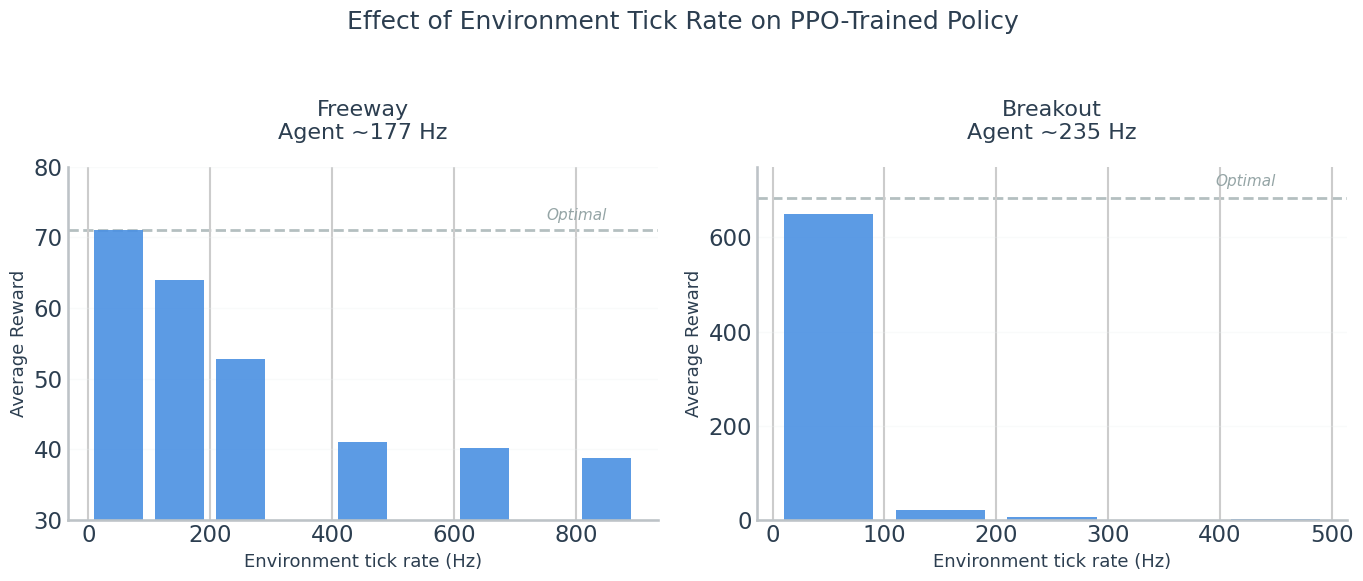

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------
# Data
# ---------------------------
data = {
    "env_hz": [50, 150, 250, 450, 650, 850],
    "Freeway": [71.0, 64.0, 52.8, 41.0, 40.2, 38.7],
    "Breakout": [650.76, 21.0, 5.3, 1.5, None, None],
}

# Optimal rewards
optimal_rewards = {"Freeway": 71.0, "Breakout": 685.0}

df = pd.DataFrame(data)

# ---------------------------
# Minimal flat design style
# ---------------------------
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# Flat color palette - using a sophisticated blue-grey
primary_color = '#4A90E2'  # Soft blue
optimal_color = '#95A5A6'  # Light grey
text_color = '#2C3E50'     # Dark blue-grey
grid_color = '#ECF0F1'     # Very light grey

fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

# ---------------------------
# Freeway subplot
# ---------------------------
env = "Freeway"
freeway_data = df[['env_hz', env]].dropna()

axes[0].bar(
    freeway_data['env_hz'], 
    freeway_data[env],
    width=80,
    color=primary_color,
    edgecolor='none',
    alpha=0.9
)

axes[0].axhline(
    optimal_rewards[env], 
    color=optimal_color, 
    linestyle='--', 
    linewidth=2,
    alpha=0.7,
    zorder=0
)

axes[0].set_title(
    f"{env}\nAgent ~177 Hz", 
    fontsize=16, 
    color=text_color,
    pad=20,
    fontweight='500'
)
axes[0].set_xlabel("Environment tick rate (Hz)", fontsize=13, color=text_color)
axes[0].set_ylabel("Average Reward", fontsize=13, color=text_color)
axes[0].set_ylim(30, 80)

# Styling
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_color('#BDC3C7')
axes[0].spines['bottom'].set_color('#BDC3C7')
axes[0].tick_params(colors=text_color, which='both', length=0)
axes[0].grid(axis='y', alpha=0.3, color=grid_color, linewidth=1)
axes[0].set_axisbelow(True)

axes[0].text(
    850, 
    optimal_rewards[env] + 1.5, 
    "Optimal", 
    fontsize=11, 
    color=optimal_color,
    ha='right',
    style='italic'
)

# ---------------------------
# Breakout subplot
# ---------------------------
env = "Breakout"
breakout_data = df[['env_hz', env]].dropna()

axes[1].bar(
    breakout_data['env_hz'], 
    breakout_data[env],
    width=80,
    color=primary_color,
    edgecolor='none',
    alpha=0.9
)

axes[1].axhline(
    optimal_rewards[env], 
    color=optimal_color, 
    linestyle='--', 
    linewidth=2,
    alpha=0.7,
    zorder=0
)

axes[1].set_title(
    f"{env}\nAgent ~235 Hz", 
    fontsize=16, 
    color=text_color,
    pad=20,
    fontweight='500'
)
axes[1].set_xlabel("Environment tick rate (Hz)", fontsize=13, color=text_color)
axes[1].set_ylabel("Average Reward", fontsize=13, color=text_color)
axes[1].set_ylim(0, 750)

# Styling
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_color('#BDC3C7')
axes[1].spines['bottom'].set_color('#BDC3C7')
axes[1].tick_params(colors=text_color, which='both', length=0)
axes[1].grid(axis='y', alpha=0.3, color=grid_color, linewidth=1)
axes[1].set_axisbelow(True)

axes[1].text(
    450, 
    optimal_rewards[env] + 25, 
    "Optimal", 
    fontsize=11, 
    color=optimal_color,
    ha='right',
    style='italic'
)

# ---------------------------
# Global title + layout
# ---------------------------
fig.suptitle(
    "Effect of Environment Tick Rate on PPO-Trained Policy", 
    fontsize=18, 
    color=text_color,
    y=0.98,
    fontweight='500'
)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('minimal_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()